In [ ]:
#system("source activate sf_test")

In [76]:
#install.packages('ggplot2')
#install.packages("dplyr")

In [77]:
library(ggplot2)
library(dplyr)
library(gridExtra)


Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



In [2]:
#find the .BED files of Roadmap enhancers intersected with hg19 files containing species counts
path <- "/dors/capra_lab/users/fongsl/broadly_active_enhancers/data/roadmap_multi_data/human_specific"
setwd(path)

In [3]:
a <- list.files()

In [ ]:
print(a)

In [66]:
bedfile = a[10]
print(bedfile)
df <-read.table(bedfile, sep = '\t', h=F, stringsAsFactors=F)
dim(df)

[1] "chr18_hspec_x_hg19.bed"


[1] 671889     13

In [100]:
graph_stuff <-function(bedfile){
    # make dataframe of the bedfile
    df <-read.table(bedfile, sep = '\t', h=F, stringsAsFactors=F)
    
    chr= unlist(strsplit(bedfile, "_"))[1]
    print(chr)
    ## format the table

    # rename columns
    names(df) = c("enh_chr", "enh_start", "enh_end", "enh_overlap", "hg19_chr", "hg19_start", "hg19_end", "hg19_strand", "hg19_ref", "hg19_46spec", "hg19_8vspec", "hg19-46spec_names", "length")

    # convert species count columns from characters to integers 
    df$hg19_46spec <- as.integer(df$hg19_46spec)
    df$hg19_8vspec <- as.integer(df$hg19_8vspec)

    # calculate the length of fragment overlap in log10
    df$log10_length = log(df$length, 10)
    
    # create a subset of the dataframe to remove non-overlapping roadmap fragments in hg19 MSA
    df2 = subset(df, df$length >0)

    #make a subset of the counts
    df_count <-plyr::count(df2, vars = c( "hg19_46spec","enh_overlap"))
    
    ggplot(df_count, aes(y = enh_overlap, x =hg19_46spec)) + 
        geom_tile(aes(fill = freq), color = "white")+
        scale_fill_gradient(low = "steelblue",high = "white")+
        ggtitle(paste0("Hg19 Species Alignments x Roadmap Enhancer Sample-Overlap - ", chr))
    ggsave(paste0(chr,"_heatmap.pdf"), path = paste0(path,"/result_pdf/"), device = "pdf", width = 7, height = 5, units = "in", dpi=300)
    
    ggplot(df2, aes(hg19_46spec)) + 
        geom_histogram(bins = 46) +
        ggtitle(paste0("overlap of hg19 species in roadmap enhancers (multi-intersected) - ", chr)) 
    ggsave(paste0(chr,"_histogram.pdf"), path = paste0(path,"/result_pdf/"), device = "pdf", width = 7, height = 5, units = "in", dpi=300)
# relatedness of species/ misrepresentation of species diversity in dataset might skew our interpretation of this graph 
    
    ggplot(df2, aes(y = hg19_46spec, x = enh_overlap, color=log10_length)) + 
        geom_point() +
        scale_fill_gradient(low = "steelblue", high = "white")
    ggsave(paste0(chr,"_dot.pdf"), path = paste0(path,"/result_pdf/"), device = "pdf", width = 8, height = 8, units = "in", dpi=300)
}



In [102]:
for (bedfile in a){
        graph_stuff(bedfile)
    }

Warning message in graph_stuff(bedfile):
“NAs introduced by coercion”Warning message in graph_stuff(bedfile):
“NAs introduced by coercion”Warning message in graph_stuff(bedfile):
“NAs introduced by coercion”Warning message in graph_stuff(bedfile):
“NAs introduced by coercion”Warning message in graph_stuff(bedfile):
“NAs introduced by coercion”Warning message in graph_stuff(bedfile):
“NAs introduced by coercion”Warning message in graph_stuff(bedfile):
“NAs introduced by coercion”Warning message in graph_stuff(bedfile):
“NAs introduced by coercion”Warning message in graph_stuff(bedfile):
“NAs introduced by coercion”Warning message in graph_stuff(bedfile):
“NAs introduced by coercion”Warning message in graph_stuff(bedfile):
“NAs introduced by coercion”Warning message in graph_stuff(bedfile):
“NAs introduced by coercion”Warning message in graph_stuff(bedfile):
“NAs introduced by coercion”Warning message in graph_stuff(bedfile):
“NAs introduced by coercion”Warning message in graph_stuff(bed

In [93]:
getwd()

[1] "/dors/capra_lab/users/fongsl/broadly_active_enhancers/data/roadmap_multi_data/human_specific"

In [67]:
# format the table

# rename columns
names(df) = c("enh_chr", "enh_start", "enh_end", "enh_overlap", "hg19_chr", "hg19_start", "hg19_end", "hg19_strand", "hg19_ref", "hg19_46spec", "hg19_8vspec", "hg19-46spec_names", "length")

# convert species count columns from characters to integers 
df$hg19_46spec <- as.integer(df$hg19_46spec)
df$hg19_8vspec <- as.integer(df$hg19_8vspec)

# calculate the length of fragment overlap in log10
df$log10_length = log(df$length, 10)
head(df)

# create a subset of the dataframe to remove non-overlapping roadmap fragments in hg19 MSA
df2 = subset(df, df$length >0)

#make a subset of the counts
df_count <-plyr::count(df2, vars = c( "hg19_46spec","enh_overlap"))

head(df2)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

enh_chr,enh_start,enh_end,enh_overlap,hg19_chr,hg19_start,hg19_end,hg19_strand,hg19_ref,hg19_46spec,hg19_8vspec,hg19-46spec_names,length,log10_length
chr18,9813,9844,1,.,-1,-1,.,.,NA,NA,.,0,-Inf
chr18,9844,9862,2,.,-1,-1,.,.,NA,NA,.,0,-Inf
chr18,9862,9864,3,.,-1,-1,.,.,NA,NA,.,0,-Inf
chr18,9864,9945,4,.,-1,-1,.,.,NA,NA,.,0,-Inf
chr18,9945,10004,5,.,-1,-1,.,.,NA,NA,.,0,-Inf
chr18,10004,10616,6,chr18,10148,11157,+,hg19,1,0,[ornAna1],468,2.670246


,enh_chr,enh_start,enh_end,enh_overlap,hg19_chr,hg19_start,hg19_end,hg19_strand,hg19_ref,hg19_46spec,hg19_8vspec,hg19-46spec_names,length,log10_length
6,chr18,10004,10616,6,chr18,10148,11157,+,hg19,1,0,[ornAna1],468,2.670246
7,chr18,10616,10750,5,chr18,10148,11157,+,hg19,1,0,[ornAna1],134,2.127105
8,chr18,10750,10763,4,chr18,10148,11157,+,hg19,1,0,[ornAna1],13,1.113943
9,chr18,10763,10811,3,chr18,10148,11157,+,hg19,1,0,[ornAna1],48,1.681241
10,chr18,10811,10822,2,chr18,10148,11157,+,hg19,1,0,[ornAna1],11,1.041393
11,chr18,10822,11510,1,chr18,10148,11157,+,hg19,1,0,[ornAna1],335,2.525045


In [68]:
df_count <-plyr::count(df2, vars = c( "hg19_46spec","enh_overlap"))
head(df_count)

hg19_46spec,enh_overlap,freq
0,1,211
0,2,89
0,3,53
0,4,29
0,5,25
0,6,28


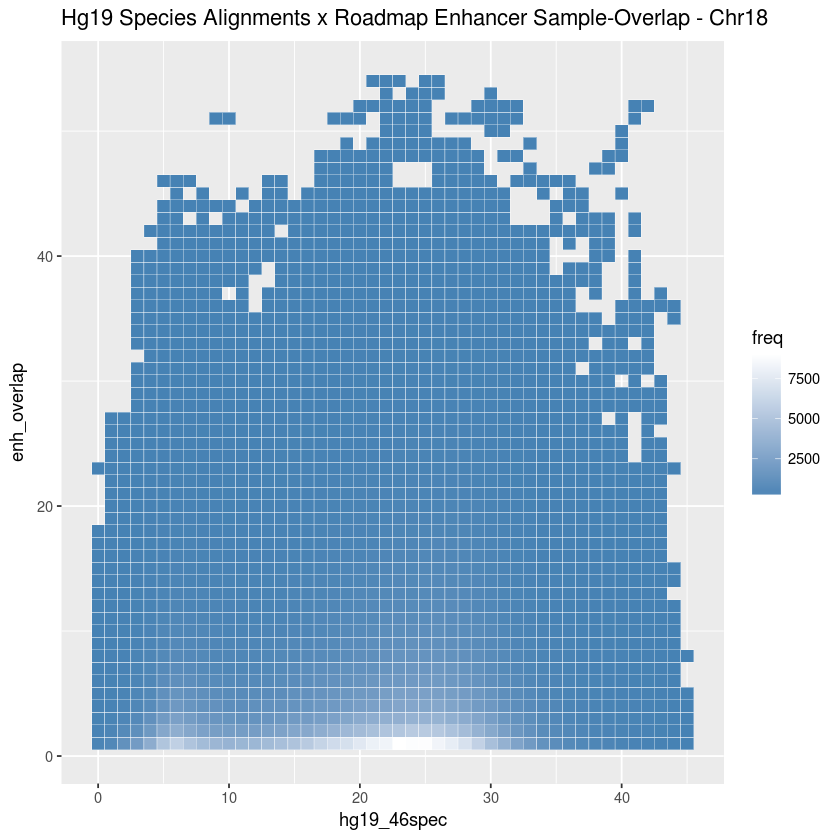

In [72]:
# the frequency of species-specific enhancers x the number of samples enhancers are found in
ggplot(df_count, aes(y = enh_overlap, x =hg19_46spec)) + 
geom_tile(aes(fill = freq), color = "white")+
scale_fill_gradient(low = "steelblue",high = "white")+
ggtitle("Hg19 Species Alignments x Roadmap Enhancer Sample-Overlap - Chr18")

ggsave("chr18_heatmap.pdf", path = paste0(path,"/result_pdf/"), device = "pdf", width = 4, height = 4, units = "in", dpi=300)

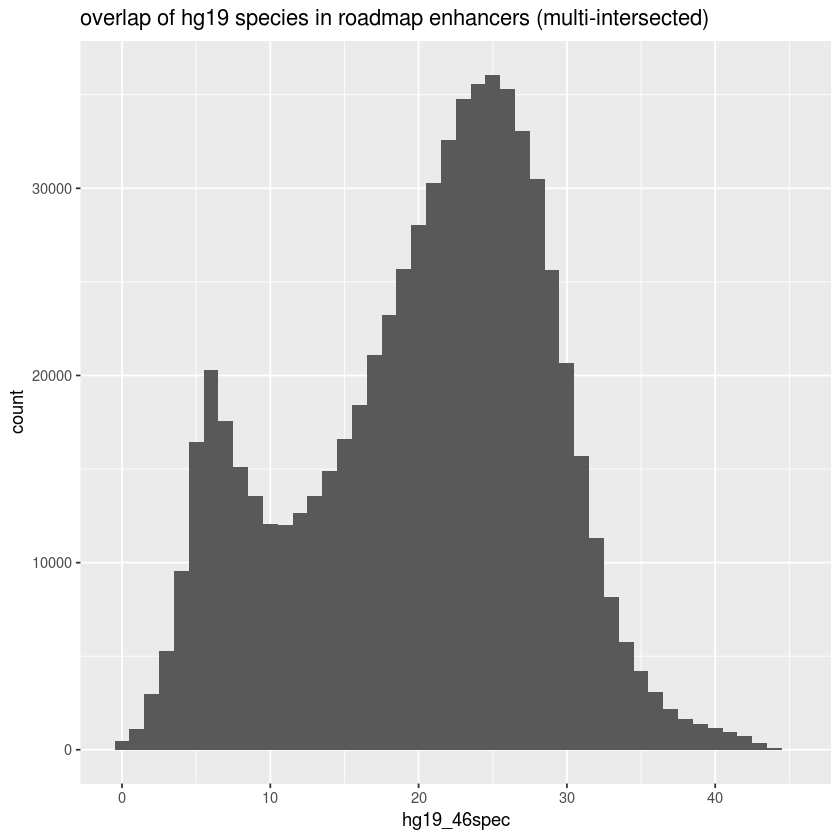

In [73]:
ggplot(df2, aes(hg19_46spec)) + 
geom_histogram(bins = 46) +
ggtitle("overlap of hg19 species in roadmap enhancers (multi-intersected)") 
ggsave("chr18_histogram.pdf", path = paste0(path,"/result_pdf/"), device = "pdf", width = 4, height = 4, units = "in", dpi=300)
# relatedness of species/ misrepresentation of species diversity in dataset might skew our interpretation of this graph 

In [8]:
# how many Roadmap enhancers do not overlap any sequencing block in Multiz46-way?

noverlap = subset(df, df$length==0)
length(noverlap)

hspecific = subset(df2, df2$hg19_46spec ==0)


[1] 14

In [64]:
summary(df)

   enh_chr            enh_start           enh_end          enh_overlap    
 Length:671889      Min.   :    9813   Min.   :    9844   Min.   : 1.000  
 Class :character   1st Qu.:19537438   1st Qu.:19537878   1st Qu.: 1.000  
 Mode  :character   Median :38102585   Median :38104646   Median : 3.000  
                    Mean   :37536783   Mean   :37537455   Mean   : 5.594  
                    3rd Qu.:55945985   3rd Qu.:55946352   3rd Qu.: 7.000  
                    Max.   :78016915   Max.   :78016949   Max.   :54.000  
                                                                          
   hg19_chr           hg19_start          hg19_end        hg19_strand       
 Length:671889      Min.   :      -1   Min.   :      -1   Length:671889     
 Class :character   1st Qu.:19537209   1st Qu.:19537297   Class :character  
 Mode  :character   Median :38103749   Median :38103803   Mode  :character  
                    Mean   :37536120   Mean   :37536219                     
               

In [ ]:
lapply(df2, class)
str(df2)

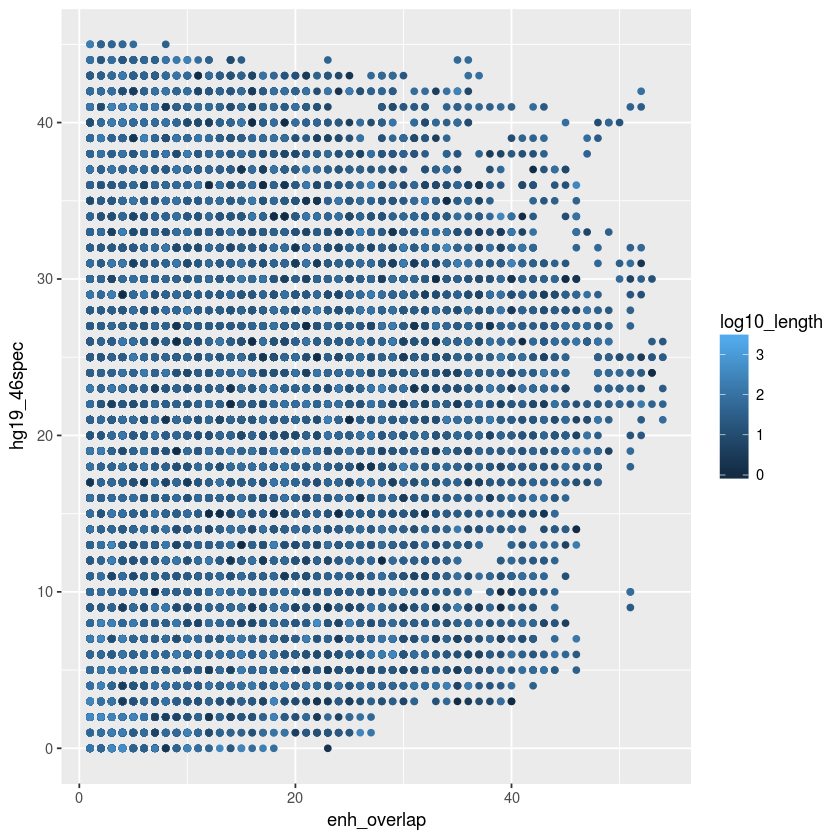

In [74]:
ggplot(df2, aes(y = hg19_46spec, x = enh_overlap, color=log10_length)) + 
geom_point() +
scale_fill_gradient(low = "steelblue", high = "white")+
ggsave("chr18_dot.pdf", path = paste0(path,"/result_pdf/"), device = "pdf", width = 4, height = 4, units = "in", dpi=300)